# Personal Information
Name: **Mannes Mokkenstorm**

StudentID: **11922222**

Email: [**11922222@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **02 04 2025**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

In this project, I make use of two widely recognized datasets in the domain of mathematical problem solving: GSM8K and the MATH dataset. The GSM8K (Grade School Math 8K) dataset consists of 8,500 high-quality grade school-level word problems, designed to evaluate the reasoning and arithmetic capabilities of language models. It emphasizes step-by-step reasoning in natural language. The MATH dataset, on the other hand, contains 12,500 competition-style problems covering a broad range of mathematical topics typically found in high school math contests. These problems are more complex and require advanced symbolic reasoning.

Together, these datasets provide a comprehensive benchmark for evaluating mathematical reasoning abilities across different difficulty levels and problem formats.


In [1]:
# Imports
import os
import numpy as np
import pandas as pd


from datasets import load_dataset
# Load the MATH dataset


/Users/mannes/thesis/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Loading

In [2]:
math_dataset = load_dataset("nlile/hendrycks-MATH-benchmark")
math_train, math_test = pd.DataFrame(math_dataset["train"]) , pd.DataFrame(math_dataset["test"])

math_train['id'] = math_train.index

gsm8k_dataset = load_dataset("gsm8k", "main")
gsm8k_train, gsm8k_test = pd.DataFrame(gsm8k_dataset["train"]) , pd.DataFrame(gsm8k_dataset["test"])

gsm8k_train.rename(columns={'question': 'problem'}, inplace=True)
gsm8k_test.rename(columns={'question': 'problem'}, inplace=True)



### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   problem  7473 non-null   object
 1   answer   7473 non-null   object
dtypes: object(2)
memory usage: 116.9+ KB
None
                                                  problem  \
count                                                7473   
unique                                               7473   
top     Natalia sold clips to 48 of her friends in Apr...   
freq                                                    1   

                                                   answer  
count                                                7473  
unique                                               7473  
top     Natalia sold 48/2 = <<48/2=24>>24 clips in May...  
freq                                                    1  


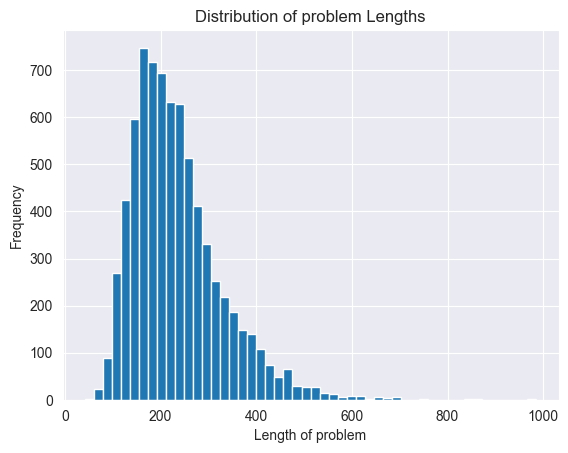

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the dataset to a DataFrame
gsm8k_df = pd.DataFrame(gsm8k_train)

# Display basic information
print(gsm8k_df.info())

# Display summary statistics
print(gsm8k_df.describe())

# Example: Plot the distribution of problem lengths
gsm8k_df['problem_length'] = gsm8k_df['problem'].apply(len)
gsm8k_df['problem_length'].hist(bins=50)
plt.title('Distribution of problem Lengths')
plt.xlabel('Length of problem')
plt.ylabel('Frequency')
plt.show()


In [4]:
math_train.rename(columns={'problem': 'problem'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   problem    12000 non-null  object
 1   solution   12000 non-null  object
 2   answer     12000 non-null  object
 3   subject    12000 non-null  object
 4   level      12000 non-null  int64 
 5   unique_id  12000 non-null  object
 6   id         12000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 656.4+ KB
None
              level           id
count  12000.000000  12000.00000
mean       3.474833   5999.50000
std        1.292158   3464.24595
min        1.000000      0.00000
25%        2.000000   2999.75000
50%        4.000000   5999.50000
75%        5.000000   8999.25000
max        5.000000  11999.00000


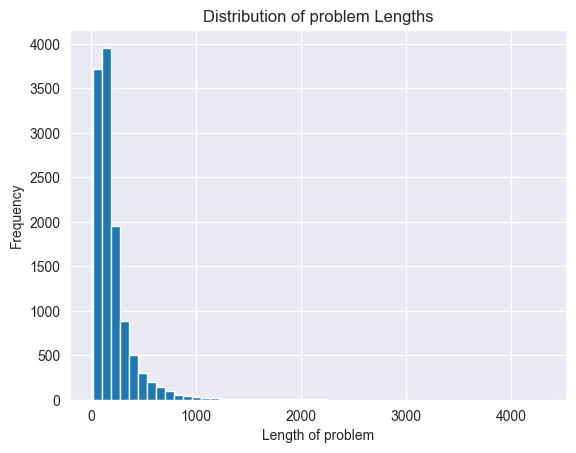

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the dataset to a DataFrame
math_train = pd.DataFrame(math_train)

# Display basic information
print(math_train.info())

# Display summary statistics
print(math_train.describe())


# Plot the distribution of problem lengths
math_train['problem_length'] = math_train['problem'].apply(len)
math_train['problem_length'].hist(bins=50)
plt.title('Distribution of problem Lengths')
plt.xlabel('Length of problem')
plt.ylabel('Frequency')
plt.show()

### Analysis 2: Analyzing the Log Probability of the token outputs

The idea behind this is to find a proxy for the difficulty of a model to output the correct tokens with a Pass@k score


### Analysis n:

In [9]:
# initialize model
from machine_learning.models.base_models.qwen_2_15b import QWen215BModel
from machine_learning.pipeline.constants import BASIC_MATH_REASONING_PROMPT

from machine_learning.pipeline.log_probability_pipeline import generate_log_probabilities



In [10]:
# Initialize the model
model = QWen215BModel(temperature=0.8, max_tokens=1024)

Ollama server started on http://localhost:11434/v1 for qwen2.5:1.5b model.


In [13]:
math_problem = BASIC_MATH_REASONING_PROMPT.format(problem="What is 2+2?")
example_output = model.generate_response(math_problem)
print(f"Example output: {example_output}")

Example output: ### Step-by-Step Reasoning and Solution

**Step 1: Identify the Problem**
The problem is to find the sum of 2 + 2.

**Step 2: RecallBasicMathOperations**
To solve this, we rely on basic arithmetic operations. Addition is a fundamental operation that combines two numbers to produce a sum.

**Step 3: Perform the Addition Operation**
We add the two numbers:
\[2 + 2 = 4\]

**Step 4: Verify the Solution**
To ensure accuracy, we can verify by breaking it down further:
- Start with 2.
- Add another 2 to it.

Counting or using a number line, we move from 2 to 4 in one step of 2 units. This confirms our addition is correct.

**Step 5: Consider edge cases**
It's important to consider if there are any edge cases that might affect the solution:
- **Negative numbers**: When adding negative numbers, the rule for integers applies. For example, \(2 + (-2) = 0\).
- **Fractional or decimal values**: If we were dealing with non-whole numbers (like fractions or decimals), we would follow t

In [27]:
# log_probabilities = generate_log_probabilities(math_train, max_sample_size=50)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")


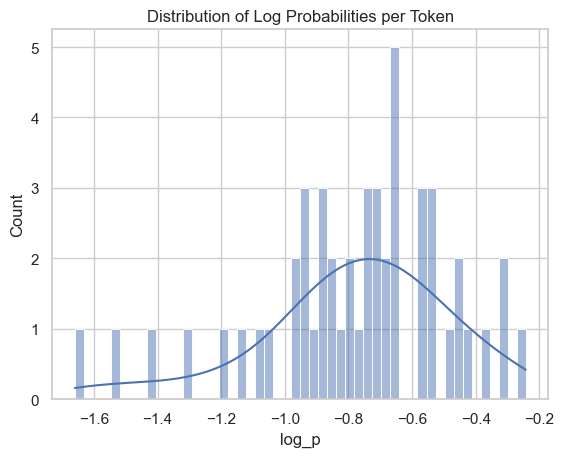

In [17]:
sns.histplot(log_probabilities['avg_log_p'], bins=50, kde=True)
plt.title('Distribution of Log Probabilities per Token')
plt.xlabel('log_p')
plt.ylabel('Count')
plt.show()


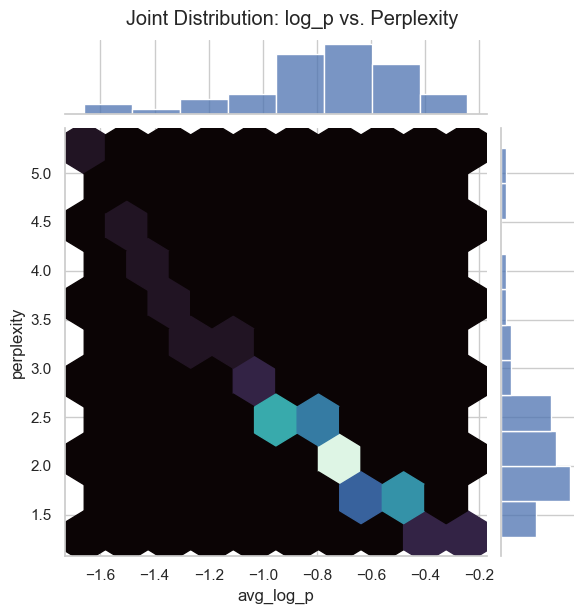

In [18]:
sns.jointplot(x='avg_log_p', y='perplexity', data=log_probabilities, kind='hex', cmap='mako')
plt.suptitle('Joint Distribution: log_p vs. Perplexity', y=1.02)
plt.show()


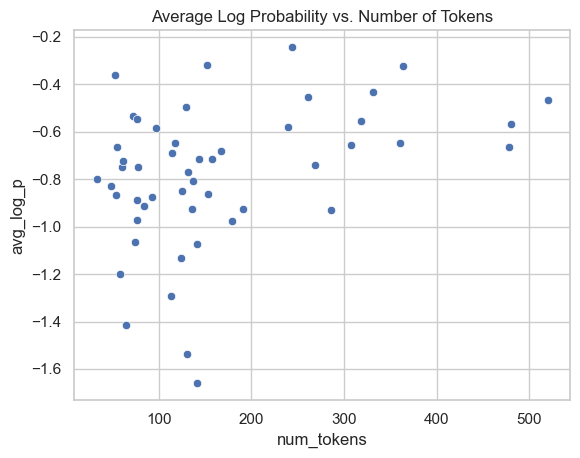

In [19]:
sns.scatterplot(x='num_tokens', y='avg_log_p', data=log_probabilities)
plt.title('Average Log Probability vs. Number of Tokens')
plt.xlabel('num_tokens')
plt.ylabel('avg_log_p')
plt.show()


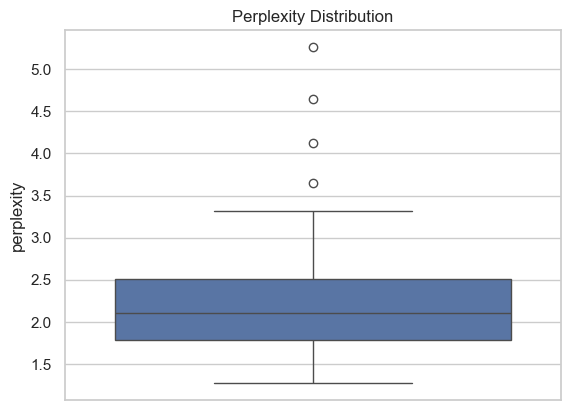

In [20]:
sns.boxplot(data=log_probabilities, y='perplexity')
plt.title('Perplexity Distribution')
plt.ylabel('perplexity')
plt.show()


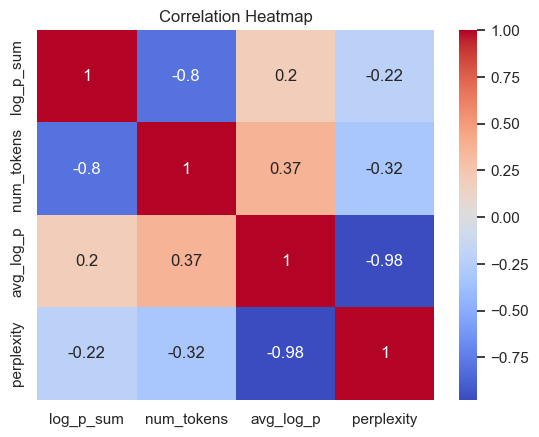

In [21]:
sns.heatmap(log_probabilities[[ 'log_p_sum', 'num_tokens', 'avg_log_p', 'perplexity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


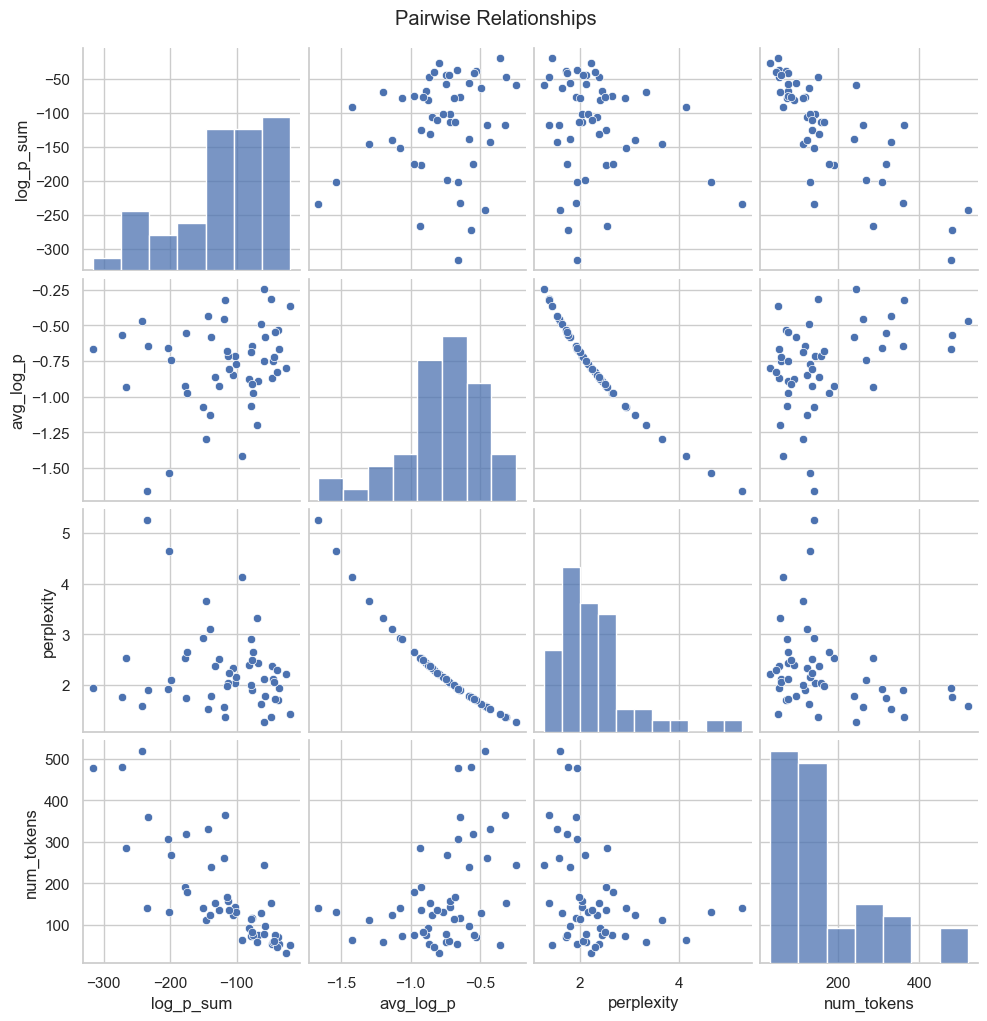

In [22]:
sns.pairplot(log_probabilities[[ 'log_p_sum', 'avg_log_p', 'perplexity', 'num_tokens']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


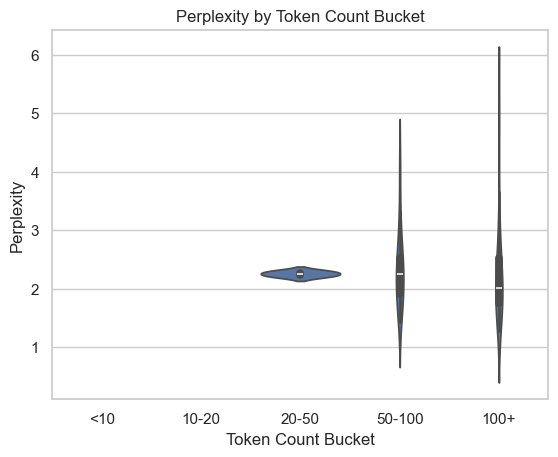

In [23]:
log_probabilities['token_bin'] = pd.cut(log_probabilities['num_tokens'], bins=[0, 10, 20, 50, 100, log_probabilities['num_tokens'].max()], labels=['<10', '10-20', '20-50', '50-100', '100+'])

sns.violinplot(x='token_bin', y='perplexity', data=log_probabilities)
plt.title('Perplexity by Token Count Bucket')
plt.xlabel('Token Count Bucket')
plt.ylabel('Perplexity')
plt.show()


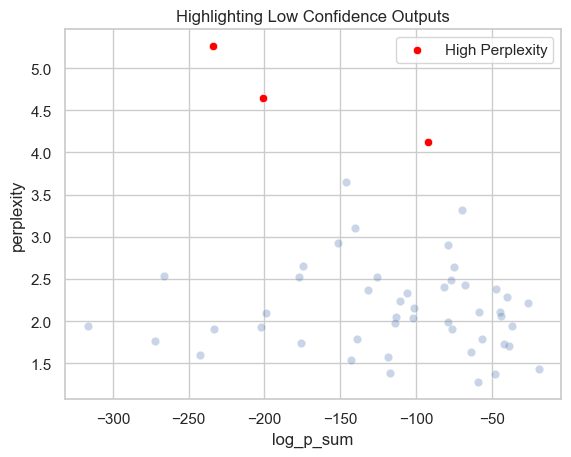

In [24]:
low_conf = log_probabilities[log_probabilities['perplexity'] > log_probabilities['perplexity'].quantile(0.95)]

sns.scatterplot(x='log_p_sum', y='perplexity', data=log_probabilities, alpha=0.3)
sns.scatterplot(x='log_p_sum', y='perplexity', data=low_conf, color='red', label='High Perplexity')
plt.title('Highlighting Low Confidence Outputs')
plt.legend()
plt.show()
